In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
import os
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score

In [2]:
os.chdir("C:\\Users\\ASUS\\Downloads\\Datasets-main")

In [3]:
df=pd.read_csv("auto-mpg.csv")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


# EDA

In [4]:
df.shape

(398, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


Car name is object column and it has multiple category. But after data visualisation, I observed here is multiple car name with same brand, so I categoried them into their brand name.

In [6]:
df['car name'].nunique()

305

In [7]:
df["car name"].sample(20)

51                      peugeot 304
325            vw rabbit c (diesel)
8                  pontiac catalina
105          plymouth custom suburb
157               chevrolet bel air
273                   datsun 200-sx
164                   buick skyhawk
100                   ford maverick
236             ford mustang ii 2+2
126                   ford maverick
84         toyota corolla 1600 (sw)
49               mercury capri 2000
22                         saab 99e
250                  dodge diplomat
172               volkswagen dasher
343                  toyota starlet
366          chrysler lebaron salon
375             volkswagen rabbit l
36                  ford torino 500
230    chevrolet monte carlo landau
Name: car name, dtype: object

In [8]:
df['car name'][1].split(" ")[0]

'buick'

In [9]:
df['carBrand']=df['car name'].apply(lambda x: x.split(" ")[0])

In [10]:
df['carBrand'].value_counts()

carBrand
ford             51
chevrolet        43
plymouth         31
amc              28
dodge            28
toyota           25
datsun           23
buick            17
pontiac          16
volkswagen       15
honda            13
mercury          11
mazda            10
oldsmobile       10
fiat              8
peugeot           8
audi              7
chrysler          6
vw                6
volvo             6
renault           5
saab              4
subaru            4
opel              4
chevy             3
bmw               2
cadillac          2
maxda             2
mercedes-benz     2
triumph           1
vokswagen         1
mercedes          1
hi                1
capri             1
chevroelt         1
toyouta           1
nissan            1
Name: count, dtype: int64

Above some car brand name is misspell so, changed it with correct.

In [11]:
df.drop('car name',axis=1,inplace=True)

In [12]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,carBrand
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet
1,15.0,8,350.0,165,3693,11.5,70,1,buick
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth
3,16.0,8,304.0,150,3433,12.0,70,1,amc
4,17.0,8,302.0,140,3449,10.5,70,1,ford


In [13]:
df['carBrand'].nunique() # Before correct it

37

In [14]:
rePlace={
   'vw':'volkswagen',
    'chevy':'chevrolet',
    'maxda':'mazda',
    'vokswagen':'volkswagen',
    'mercedes ':'mercedes-benz',
    'chevroelt':'chevrolet',
    'toyouta':'toyota'
}
df['carBrand']=df['carBrand'].replace(rePlace)

In [15]:
df['carBrand'].nunique() # After correct it

31

Here are some missing data in hoursepower column, need to fill with suitable value

In [16]:
df[df["horsepower"]=="?"]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,carBrand
32,25.0,4,98.0,?,2046,19.0,71,1,ford
126,21.0,6,200.0,?,2875,17.0,74,1,ford
330,40.9,4,85.0,?,1835,17.3,80,2,renault
336,23.6,4,140.0,?,2905,14.3,80,1,ford
354,34.5,4,100.0,?,2320,15.8,81,2,renault
374,23.0,4,151.0,?,3035,20.5,82,1,amc


Here, I used displacement and carBrand relationship with horsepower and where the same displacement with same brand name, I used mode of horsepower

In [17]:
df[(df.carBrand=="ford") & (df.displacement==98.0)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,carBrand
32,25.0,4,98.0,?,2046,19.0,71,1,ford
245,36.1,4,98.0,66,1800,14.4,78,1,ford
351,34.4,4,98.0,65,2045,16.2,81,1,ford
352,29.9,4,98.0,65,2380,20.7,81,1,ford


For example which car brand is ford and displacement is 98, I used mode of horsepower of this category 

In [18]:
df[(df.carBrand=="ford") & (df.displacement==98.0) & (df.horsepower=="?")]["horsepower"]

32    ?
Name: horsepower, dtype: object

In [19]:
df.loc[(df.carBrand == "ford") & (df.displacement == 98.0) & (df.horsepower == "?"), "horsepower"] = \
    df.loc[(df.carBrand == "ford") & (df.displacement == 98.0), "horsepower"].mode()[0]


In [20]:
df[(df.carBrand=="ford") & (df.displacement==98.0) & (df.horsepower=="?")]["horsepower"]

Series([], Name: horsepower, dtype: object)

For applying this to all missed data point, I need carBrand and displacement columns vlaues

In [21]:
df[df["horsepower"]=="?"][["carBrand","displacement"]]


,carBrand,displacement
126,ford,200.0
330,renault,85.0
336,ford,140.0
354,renault,100.0
374,amc,151.0


I used this in for loop for applying on it 

In [22]:
for car,dist in zip(df[df["horsepower"]=="?"]["carBrand"],df[df["horsepower"]=="?"]["displacement"]):
    df.loc[(df.carBrand == car) & (df.displacement == dist) & (df.horsepower == "?"), "horsepower"] = \
    df.loc[(df.carBrand == car) & (df.displacement == dist), "horsepower"].mode()[0]

After doing this 2 missing value is still remain, because for that bran name and displacement both value is unique, so I used here mode of all data

In [23]:
df[df["horsepower"]=="?"]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,carBrand
330,40.9,4,85.0,?,1835,17.3,80,2,renault
354,34.5,4,100.0,?,2320,15.8,81,2,renault


In [24]:
df[(df.carBrand=="renault") & (df.displacement==100.0)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,carBrand
354,34.5,4,100.0,?,2320,15.8,81,2,renault


In [25]:
df[df.displacement==100.0]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,carBrand
354,34.5,4,100.0,?,2320,15.8,81,2,renault


In [26]:
df.horsepower=df.horsepower.replace("?",df.horsepower.mode()[0])

In [27]:
df[df["horsepower"]=="?"]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,carBrand


Now convert categorical into numerical

In [28]:
df["horsepower"]=df["horsepower"].astype(int)

In [29]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.472362,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.414982,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,92.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,128.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [30]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
carBrand        0
dtype: int64

<Axes: xlabel='acceleration', ylabel='weight'>

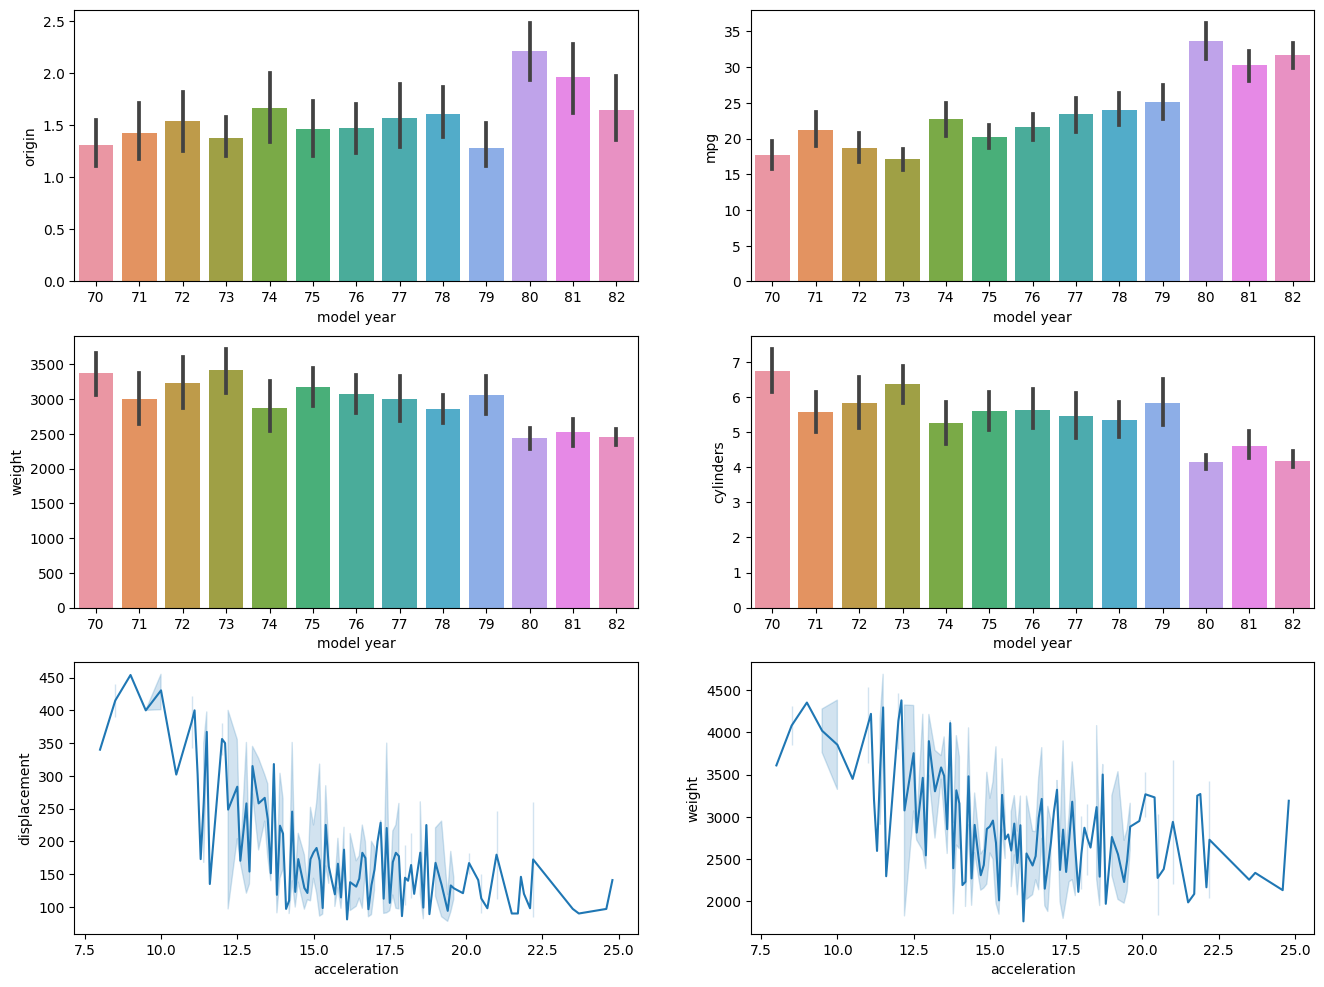

In [31]:
plt.figure(figsize=(16,12))
plt.subplot(3,2,1)
sns.barplot(x=df['model year'],y=df.origin)
plt.subplot(3,2,2)
sns.barplot(x=df['model year'],y=df.mpg)
plt.subplot(3,2,3)
sns.barplot(x=df['model year'],y=df.weight)
plt.subplot(3,2,4)
sns.barplot(x=df['model year'],y=df.cylinders)
plt.subplot(3,2,5)
sns.lineplot(x="acceleration",y="displacement",data=df)
plt.subplot(3,2,6)
sns.lineplot(x="acceleration",y="weight",data=df)

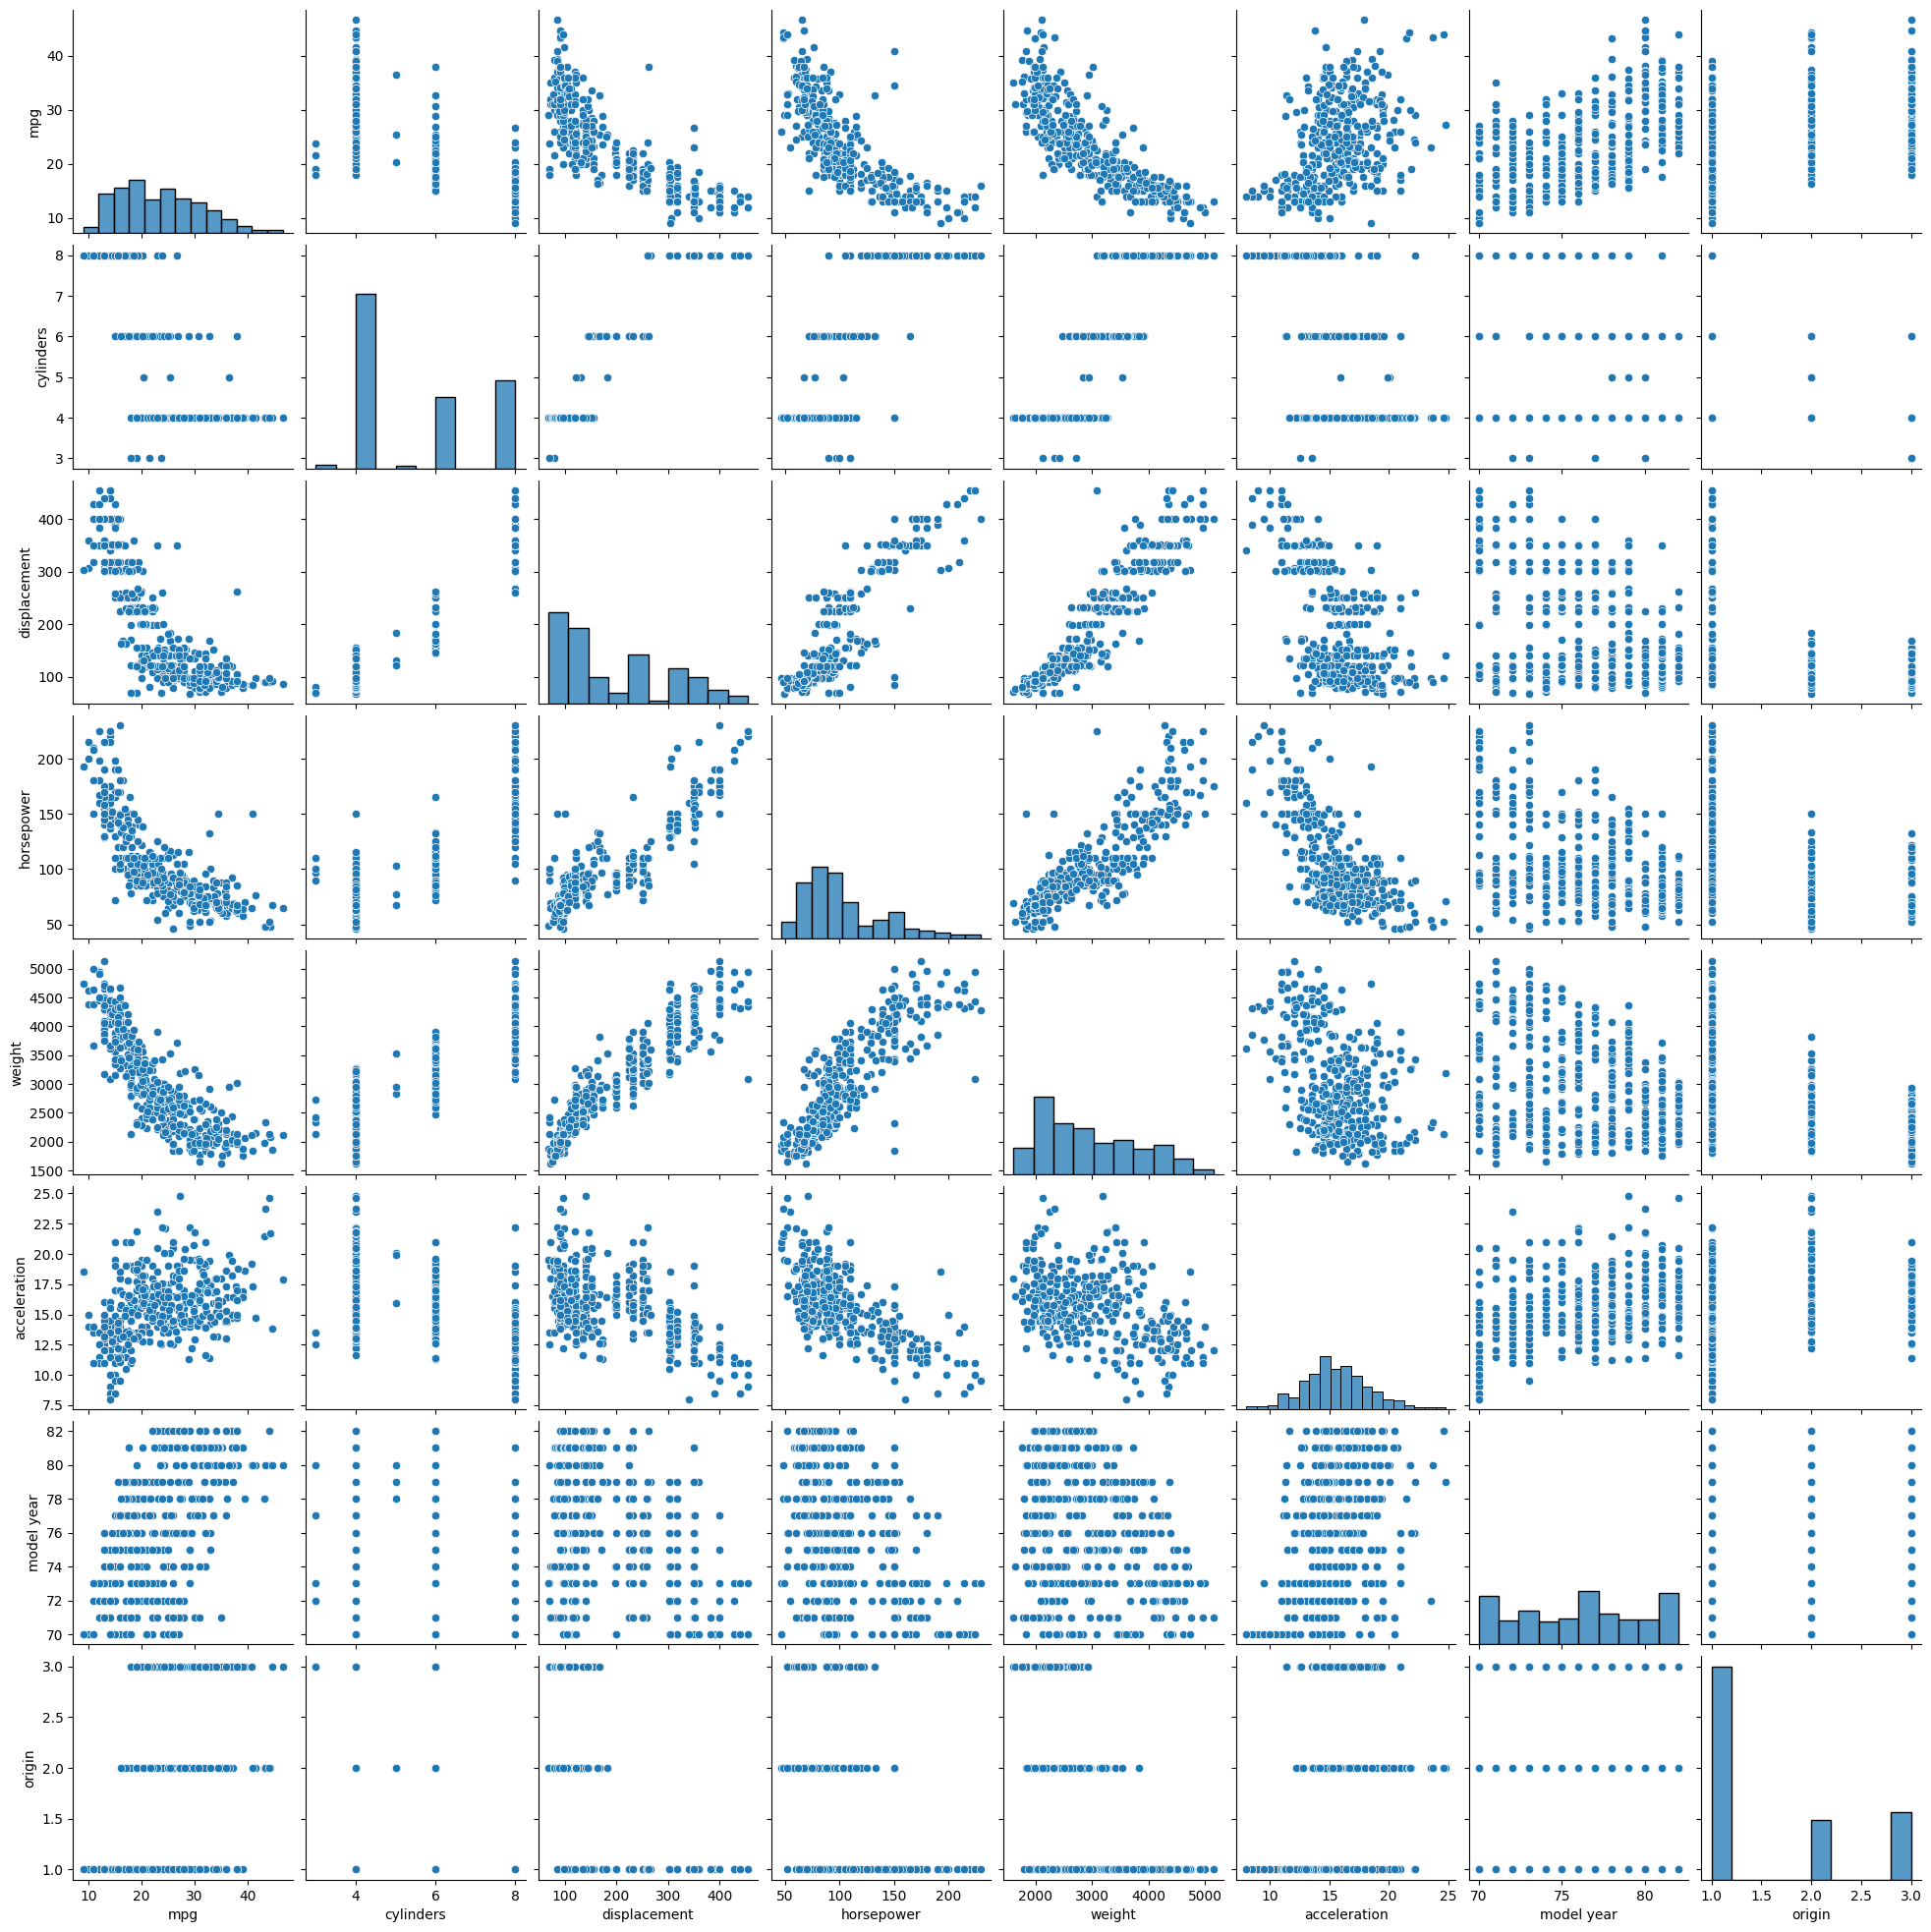

In [32]:
sns.pairplot(df)

# Feature extraction
carBrand and which one have least category of data points, I used get Dummies

In [33]:
print(df.apply(lambda x: x.nunique()))

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model year       13
origin            3
carBrand         31
dtype: int64


In [34]:
dumies=[('cylinders','cy'),('origin','ori'),('carBrand','brand')]
for col,pre in dumies:
    df_dummies=pd.get_dummies(df[col],prefix=pre)
    df=pd.concat([df,df_dummies],axis=1)
    df=df.drop(col,axis=1)

In [35]:
df.head()

,mpg,displacement,horsepower,weight,acceleration,model year,cy_3,cy_4,cy_5,cy_6,...,brand_peugeot,brand_plymouth,brand_pontiac,brand_renault,brand_saab,brand_subaru,brand_toyota,brand_triumph,brand_volkswagen,brand_volvo
0,18.0,307.0,130,3504,12.0,70,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,15.0,350.0,165,3693,11.5,70,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,18.0,318.0,150,3436,11.0,70,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,16.0,304.0,150,3433,12.0,70,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,17.0,302.0,140,3449,10.5,70,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Data Splitting

In [36]:
x=df.drop("mpg",axis=1)
y=df["mpg"]

In [37]:
x.shape,y.shape

((398, 44), (398,))

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((266, 44), (132, 44), (266,), (132,))

# Sacling

In [39]:
scale=StandardScaler()
x_train=scale.fit_transform(x_train)
x_test=scale.transform(x_test)

In [40]:
x_test

array([[-1.0277151 , -1.39934869, -1.4590178 , ..., -0.06142951,
        -0.23570226, -0.12356041],
       [-0.74413903, -0.69313915, -0.46252293, ..., -0.06142951,
        -0.23570226, -0.12356041],
       [ 0.35105129, -0.12273914, -0.45171756, ..., -0.06142951,
        -0.23570226, -0.12356041],
       ...,
       [-0.74413903, -0.82894868, -0.45051697, ..., -0.06142951,
        -0.23570226, -0.12356041],
       [-1.04727207, -1.20921535, -1.25131465, ..., -0.06142951,
        -0.23570226, -0.12356041],
       [-1.10594298, -1.18205345, -1.20929378, ..., -0.06142951,
        -0.23570226, -0.12356041]])

In [41]:
x_train

array([[-1.08638601, -1.07340583, -1.08082999, ..., -0.06142951,
        -0.23570226, -0.12356041],
       [ 0.35105129, -0.39435819,  0.24102646, ..., -0.06142951,
        -0.23570226, -0.12356041],
       [-0.80280994, -0.36719629, -0.51414857, ..., -0.06142951,
        -0.23570226, -0.12356041],
       ...,
       [-0.60724024, -0.25854866, -0.59458851, ..., -0.06142951,
        -0.23570226, -0.12356041],
       [-1.04727207, -1.15489154, -1.15286576, ..., -0.06142951,
        -0.23570226, -0.12356041],
       [-0.96904419, -1.58948203, -1.27292538, ..., -0.06142951,
         4.24264069, -0.12356041]])

In [42]:
y_train

324    40.8
176    19.0
119    20.0
192    22.0
202    17.5
       ... 
71     19.0
106    12.0
270    21.1
348    37.7
102    26.0
Name: mpg, Length: 266, dtype: float64

# Linear Regression

In [43]:
model_lr=LinearRegression()
model_lr.fit(x_train,y_train)

LinearRegression()

In [44]:
model_lr.intercept_

23.291063581642454

In [45]:
model_lr.coef_

array([ 7.97214319e-01, -1.10330772e+00, -4.49731622e+00,  6.76579298e-02,
        2.48024992e+00, -7.37204540e+11, -3.49021380e+12, -7.37204540e+11,
       -2.91782160e+12, -3.05989947e+12,  2.26910411e+12, -7.87957266e+11,
        3.07415554e+12,  4.08739296e+11,  1.14773763e+12,  7.30052892e+11,
        3.85482573e+11,  1.02269279e+11,  1.02269279e+11,  5.20829327e+11,
        1.44357456e+11, -3.72564596e+11,  4.69666207e+11,  1.02853247e+12,
        5.84765148e+11,  1.02269279e+11, -2.37431530e+11, -2.01439551e+11,
        5.17202126e+11,  7.30052892e+11,  2.85415205e+11, -7.94365769e-06,
        2.26948603e+11,  8.92433503e+11,  1.25487268e+12,  4.40661197e+11,
        3.02141287e+11,  8.92433503e+11,  7.30052892e+11, -1.80517841e+11,
       -3.52670785e+11,  5.17202126e+11,  1.88712928e+12,  1.02853247e+12])

In [46]:
y_pred=model_lr.predict(x_test)

In [47]:
y_pred

array([3.35788452e+01, 2.85156128e+01, 1.81022827e+01, 1.81533081e+01,
       1.44511596e+01, 2.64019653e+01, 2.69326049e+01, 5.12230220e+00,
       2.13312866e+01, 1.96210815e+01, 1.09494506e+01, 3.64431030e+01,
       2.66977417e+01, 1.27678100e+01, 2.51564819e+01, 7.68822017e+00,
       3.18177368e+01, 2.12162165e+01, 1.80872680e+01, 4.22563354e+01,
       2.63506500e+01, 1.89409057e+01, 2.49018432e+01, 2.88630249e+01,
       1.60822631e+01, 3.62012359e+01, 2.65363647e+01, 2.75858032e+01,
       1.85378295e+01, 8.63426510e+00, 2.74975463e+01, 3.61875640e+01,
       2.30041381e+01, 2.53311645e+01, 3.53847534e+01, 1.33968383e+01,
       1.93791381e+01, 2.17531616e+01, 1.44619018e+01, 2.69228393e+01,
       2.74201538e+01, 2.96123687e+01, 2.04261775e+01, 6.36082760e+00,
       2.40704223e+01, 1.48327312e+12, 2.79015991e+01, 2.26435424e+01,
       2.12558471e+01, 2.99072906e+01, 2.38884155e+01, 4.00917846e+01,
       3.32917358e+01, 6.57640377e+00, 2.59709350e+01, 1.26692993e+01,
      

In [48]:
y_test

198    33.0
396    28.0
33     19.0
208    13.0
93     14.0
       ... 
392    27.0
379    36.0
358    31.6
310    38.1
145    32.0
Name: mpg, Length: 132, dtype: float64

In [49]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=root_mean_squared_error(y_test,y_pred)
print(mse)
print(mae)
print(rmse)

1.6667417724036686e+22
11236917555.607697
129102353673.49693


In [50]:
score=r2_score(y_pred,y_test)
score

-0.007633587770186745

# Ridge

In [51]:
model_ridge=Ridge()
model_ridge.fit(x_train,y_train)

Ridge()

In [52]:
y_pred_ridge=model_ridge.predict(x_test)
y_pred_ridge

array([33.51281633, 28.52289293, 18.03233194, 18.12011822, 14.49803829,
       26.41991051, 26.97799251,  5.12196406, 21.46844954, 19.57656252,
       10.88297431, 36.4007776 , 26.63346179, 12.84738552, 25.18473321,
        7.84224674, 31.84129771, 21.18919177, 17.96883513, 42.05031202,
       26.42704676, 18.91042487, 24.74304501, 28.84546652, 16.0528534 ,
       36.10184718, 26.56503448, 27.60513436, 18.53082996,  8.71546875,
       27.53572379, 36.12791334, 22.81494803, 25.3694784 , 35.34953826,
       13.31651482, 19.39069441, 21.63580749, 14.56104829, 26.88985003,
       27.44398329, 29.57064963, 20.48810012,  6.43556794, 24.16173315,
       34.11842269, 27.9053771 , 22.65437497, 21.22440308, 29.97375209,
       23.88221177, 39.94469689, 33.28740586,  6.57946877, 25.94616162,
       12.64926456, 14.97669779, 29.0400048 , 24.03022496, 20.37030135,
       18.97829915, 32.81073566, 23.49907349, 22.43261562, 20.66177478,
       24.90349887, 29.07814564, 31.0724828 , 28.81991236, 14.42

In [53]:
mse=mean_squared_error(y_test,y_pred_ridge)
mae=mean_absolute_error(y_test,y_pred_ridge)
rmse=root_mean_squared_error(y_test,y_pred_ridge)
print(mse)
print(mae)
print(rmse)

11.69969800690912
2.698493031823302
3.4204821307688658


In [54]:
score=r2_score(y_pred_ridge,y_test)
score

0.8299012603953925

# Lasso

In [55]:
model_lasso=Lasso()
model_lasso.fit(x_train,y_train)

Lasso()

In [56]:
y_pred_lasso=model_lasso.predict(x_test)
y_pred_lasso

array([30.40905381, 29.11137264, 20.79593721, 17.70389547, 14.62595311,
       26.7205649 , 28.01572191, 12.35247784, 17.73009496, 21.41779585,
       14.67061532, 33.07711705, 25.85579079, 15.62692617, 24.89808629,
       10.20008162, 29.33963321, 23.45681919, 16.99966114, 33.05429099,
       24.84426303, 19.31343529, 26.1926032 , 28.75211459, 16.25017846,
       32.32385717, 26.54132989, 25.71624903, 21.27150722, 11.5718267 ,
       28.35811276, 33.00863888, 19.6085785 , 25.90795728, 31.68254591,
       14.43877944, 22.68355118, 21.20302904, 14.58248266, 27.32535447,
       25.08683215, 27.36088626, 22.91774383, 11.17822862, 24.86708908,
       32.18690083, 27.20209376, 25.83590379, 24.31708205, 27.88111849,
       23.78775004, 31.30939035, 30.44537363, 13.20736414, 26.12075159,
       12.4416004 , 19.42597005, 28.52341964, 24.44514047, 20.21595349,
       17.24181922, 29.83502895, 25.02928565, 22.70774411, 20.71137986,
       25.56219298, 25.76527458, 31.18517037, 27.77178592, 14.68

In [57]:
mse=mean_squared_error(y_test,y_pred_lasso)
mae=mean_absolute_error(y_test,y_pred_lasso)
rmse=root_mean_squared_error(y_test,y_pred_lasso)
print(mse)
print(mae)
print(rmse)

8.720427025720205
2.272055837729438
2.953036915739491


In [58]:
score=r2_score(y_pred_lasso,y_test)
score

0.7693765927471821

# polynomial regression

In [60]:
poly=PolynomialFeatures(degree=2)
x_poly=poly.fit_transform(x)
pd.DataFrame(x_poly).head(10)

,0,1,2,3,4,5,6,7,8,9,...,1025,1026,1027,1028,1029,1030,1031,1032,1033,1034
0,1.0,307.0,130.0,3504.0,12.0,70.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,350.0,165.0,3693.0,11.5,70.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,318.0,150.0,3436.0,11.0,70.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,304.0,150.0,3433.0,12.0,70.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,302.0,140.0,3449.0,10.5,70.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,429.0,198.0,4341.0,10.0,70.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.0,454.0,220.0,4354.0,9.0,70.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.0,440.0,215.0,4312.0,8.5,70.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.0,455.0,225.0,4425.0,10.0,70.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.0,390.0,190.0,3850.0,8.5,70.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Split train and test

In [61]:
x_poly_train,x_poly_test,y_poly_train,y_poly_test=train_test_split(x_poly,y,test_size=0.33)


In [65]:
model_polyRidge=Ridge()
model_polyRidge.fit(x_poly_train,y_poly_train)

Ridge()

In [66]:
y_poly_pred=model_polyRidge.predict(x_poly_test)
y_poly_pred

array([32.46185261, 33.345133  , 28.95821789, 22.89329955, 22.53123228,
       35.96382557, 28.43619406, 27.49672685, 28.49721761, 22.01957072,
       18.87535619, 14.98220542, 34.14790381, 35.18579268, 13.38781742,
       36.2453066 , 28.79644695, 16.69256806, 27.53146067, 18.56704005,
       17.97667109, 13.80889074, 15.18805192, 18.50690082, 17.80353245,
       18.20442364, 17.96227857, 28.96967246, 30.56903023, 21.17025045,
       17.1235801 , 22.7768333 , 31.91049907, 28.16868203, 54.32871599,
       21.17843954, 15.35780744, 35.24241011, 30.80038618, 30.66765102,
       34.2586891 , 38.51371215, 30.77768098, 19.85017935, 31.8992502 ,
       27.4601073 , 12.82069332, 35.74881204, 27.5514832 , 17.07722389,
       12.83246904, 27.15457235, 13.92941765, 20.95449891, 19.00884994,
        3.33744789, 33.36003576,  4.80462369, 11.08523995, 39.47891651,
       14.17936658, 20.69116128, 16.99827016, 11.52879022, 33.28286245,
       29.99151582, 32.93468021, 26.49490766, 33.9493527 , 15.35

In [67]:
mse=mean_squared_error(y_poly_test,y_poly_pred)
mae=mean_absolute_error(y_poly_test,y_poly_pred)
rmse=root_mean_squared_error(y_poly_test,y_poly_pred)
print(mse)
print(mae)
print(rmse)

25.10698573377285
3.4851344639457262
5.010687151855806


In [68]:
score=r2_score(y_poly_pred,y_poly_test)
score

0.6656971064784021

At the end I got maximum score in Ridge Regression that is 83%